In [18]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from PIL import Image
import numpy as np
import os
import numpy as np
from six.moves import cPickle as pickle
from six.moves import range
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0,4.0)



In [17]:
#jpg and jpeg files already resized to 32x32 and named with label, convert to numpy arrays
real_test_dataset = []
real_test_labels = []

for filename in os.listdir('Test_Images'):
    img = Image.open('Test_Images/'+filename)
    img.load()
    data = np.asarray(img, dtype="float32")
    real_test_dataset.append(data)
    label = []
    for c in filename[:5]:
        if c == 't':
            label.append(10)
        else:
            label.append(int(c))
    real_test_labels.append(label)
    print(data.shape)
    print(label)
    
n_real_test_dataset = []
    
for im in real_test_dataset:
    im = np.dot(np.array(im, dtype='float32'), [[0.2989],[0.5870],[0.1140]])
    mean = np.mean(im, dtype='float32')
    std = np.std(im, dtype='float32', ddof=1)
    if std < 1e-4: 
        std = 1.
    im = (im - mean) / std
    n_real_test_dataset.append(im)
    
real_test_dataset = np.array(n_real_test_dataset)
print(real_test_dataset.shape)

(32, 32, 3)
[1, 2, 3, 10, 10]
(32, 32, 3)
[1, 2, 5, 5, 7]
(32, 32, 3)
[1, 3, 3, 3, 0]
(32, 32, 3)
[1, 4, 0, 4, 1]
(32, 32, 3)
[1, 4, 6, 6, 4]
(32, 32, 3)
[1, 5, 5, 9, 5]
(32, 32, 3)
[1, 5, 10, 10, 10]
(32, 32, 3)
[1, 6, 3, 1, 4]
(32, 32, 3)
[1, 9, 1, 7, 7]
(32, 32, 3)
[2, 1, 7, 1, 3]
(32, 32, 3)
[2, 3, 10, 10, 10]
(32, 32, 3)
[3, 5, 9, 8, 2]
(32, 32, 3)
[5, 5, 10, 10, 10]
(32, 32, 3)
[5, 8, 4, 1, 10]
(32, 32, 3)
[5, 10, 10, 10, 10]
(32, 32, 3)
[5, 10, 10, 10, 10]
(32, 32, 3)
[6, 2, 3, 9, 5]
(32, 32, 3)
[6, 3, 4, 1, 9]
(32, 32, 3)
[7, 0, 5, 10, 10]
(32, 32, 3)
[7, 1, 8, 10, 10]
(20, 32, 32, 1)


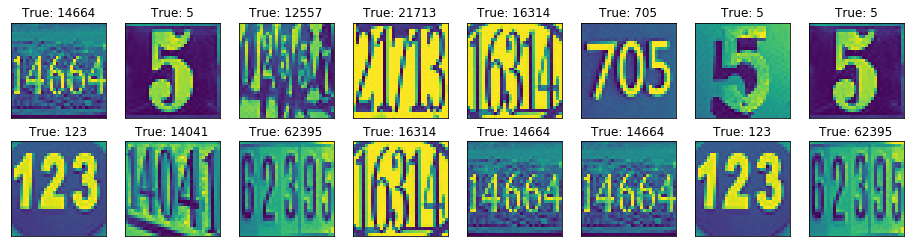

In [20]:
#plot images to confirm they were processed like training pictures
def plot_images(images, nrows, ncols, cls_true, cls_pred=None):
    
    # Initialize figure
    fig, axes = plt.subplots(nrows, ncols, figsize=(16, 2*nrows))
    
    # Randomly select nrows * ncols images
    rs = np.random.choice(images.shape[0], nrows*ncols)
    
    # For every axes object in the grid
    for i, ax in zip(rs, axes.flat): 
        
        # Pretty string with actual number
        true_number = ''.join(str(x) for x in cls_true[i][:] if x != 10)
        
        if cls_pred is None:
            title = "True: {0}".format(true_number)
        else:
            # Pretty string with predicted number
            pred_number = ''.join(str(x) for x in cls_pred[i] if x != 10)
            title = "True: {0}, Pred: {1}".format(true_number, pred_number) 
            
        ax.imshow(images[i,:,:,0])
        ax.set_title(title)   
        ax.set_xticks([]); ax.set_yticks([])
        
        
# Plot some images from the training set
plot_images(real_test_dataset, 2, 8, real_test_labels)